In [1]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline



In [2]:
data = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180630.txt')

In [3]:
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,00:00:00,REGULAR,6667150,2259901
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196690 entries, 0 to 196689
Data columns (total 11 columns):
C/A                                                                     196690 non-null object
UNIT                                                                    196690 non-null object
SCP                                                                     196690 non-null object
STATION                                                                 196690 non-null object
LINENAME                                                                196690 non-null object
DIVISION                                                                196690 non-null object
DATE                                                                    196690 non-null object
TIME                                                                    196690 non-null object
DESC                                                                    196690 non-null object
ENTRIES                           

In [5]:
data['date_time'] = data['DATE']+' '+data['TIME']
data['date_time'] = pd.to_datetime(data['date_time'])

In [6]:
data.index = data['date_time']
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date_time
date_time,,,,,,,,,,,,
2018-06-23 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,00:00:00,REGULAR,6667150,2259901,2018-06-23 00:00:00
2018-06-23 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909,2018-06-23 04:00:00
2018-06-23 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938,2018-06-23 08:00:00
2018-06-23 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006,2018-06-23 12:00:00
2018-06-23 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066,2018-06-23 16:00:00


#3: Time Intervals

In [7]:
data[(data['DESC']=='REGULAR')].date_time.value_counts().head()

2018-06-26 16:00:00    2442
2018-06-25 00:00:00    2442
2018-06-24 08:00:00    2441
2018-06-24 00:00:00    2441
2018-06-23 16:00:00    2441
Name: date_time, dtype: int64

the data description was inaccurate. most of the data is collected every 4 hours on the hour, but there are plenty of outliers. Now, we're investigating the day frequency.

In [8]:
data[(data['DESC']=='REGULAR')].DATE.value_counts()

06/25/2018    28099
06/23/2018    28072
06/26/2018    28055
06/24/2018    28037
06/27/2018    27994
06/28/2018    27972
06/29/2018    27876
Name: DATE, dtype: int64

Identifying unique turnstiles:

In [9]:
data['turnstile_id'] = data['STATION']+'_'+data['C/A']+'_'+data['UNIT']+'_'+data['SCP']

In [10]:
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date_time,turnstile_id
date_time,,,,,,,,,,,,,
2018-06-23 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,00:00:00,REGULAR,6667150,2259901,2018-06-23 00:00:00,59 ST_A002_R051_02-00-00
2018-06-23 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909,2018-06-23 04:00:00,59 ST_A002_R051_02-00-00
2018-06-23 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938,2018-06-23 08:00:00,59 ST_A002_R051_02-00-00
2018-06-23 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006,2018-06-23 12:00:00,59 ST_A002_R051_02-00-00
2018-06-23 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066,2018-06-23 16:00:00,59 ST_A002_R051_02-00-00


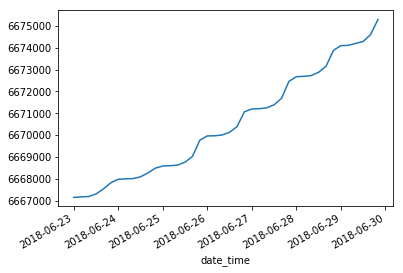

In [11]:
data[(data['turnstile_id']=='59 ST_A002_R051_02-00-00')].ENTRIES.plot.line()

we see from this plot that turnstile entry/exit data is cumulative over all time.

In [12]:
def difference(srs):
    return srs.max() - srs.min()

In [13]:
df_daily = data.groupby(by=['turnstile_id', 'DATE']).agg(difference)

In [14]:
df_daily.head()

ENTRIES  \
turnstile_id            DATE                  
1 AV_H007_R248_00-00-00 06/23/2018     2132   
                        06/24/2018     2393   
                        06/25/2018     3266   
                        06/26/2018     3467   
                        06/27/2018     3538   

                                    EXITS                                                                 \
turnstile_id            DATE                                                                               
1 AV_H007_R248_00-00-00 06/23/2018                                               3721                      
                        06/24/2018                                               2991                      
                        06/25/2018                                               3709                      
                        06/26/2018                                               3813                      
                        06/27/2018                                               3671                      

                                   date_time  
turnstile_id            DATE                  
1 AV_H007_R248_00-00-00 06/23/2018  20:00:00  
                        06/24/2018  20:00:00  
                        06/25/2018  20:00:00  
                        06/26/2018  20:00:00  
                        06/27/2018  20:00:00

In [15]:
by_station =  data.groupby(by=['STATION','turnstile_id', 'DATE']).agg(difference)

In [16]:
daily_totals = by_station.groupby(by=['STATION','DATE']).sum()

In [17]:

daily_totals.reset_index(inplace=True)


In [18]:
daily_totals["DATE"] = pd.to_datetime(daily_totals["DATE"])
print(daily_totals)

              STATION       DATE  ENTRIES  \
0                1 AV 2018-06-23    13603   
1                1 AV 2018-06-24    13664   
2                1 AV 2018-06-25    16913   
3                1 AV 2018-06-26    17616   
4                1 AV 2018-06-27    17258   
5                1 AV 2018-06-28    17511   
6                1 AV 2018-06-29    17774   
7              103 ST 2018-06-23    16652   
8              103 ST 2018-06-24    15765   
9              103 ST 2018-06-25    30342   
10             103 ST 2018-06-26    31569   
11             103 ST 2018-06-27    30260   
12             103 ST 2018-06-28    26463   
13             103 ST 2018-06-29    18072   
14      103 ST-CORONA 2018-06-23    10242   
15      103 ST-CORONA 2018-06-24     7818   
16      103 ST-CORONA 2018-06-25    18416   
17      103 ST-CORONA 2018-06-26    19239   
18      103 ST-CORONA 2018-06-27    18368   
19      103 ST-CORONA 2018-06-28    17740   
20      103 ST-CORONA 2018-06-29    18317   
21        

(array([ 736868.,  736869.,  736870.,  736871.,  736872.,  736873.,  736874.]),
 <a list of 7 Text xticklabel objects>)

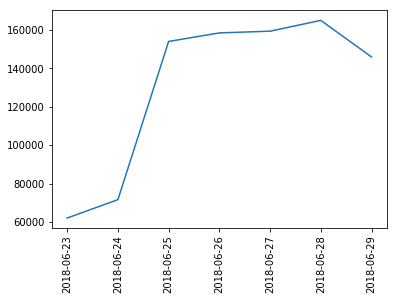

In [29]:
import matplotlib.pyplot as plt
daily_onestation = daily_totals[daily_totals["STATION"]=='34 ST-PENN STA']
plt.plot(daily_onestation["DATE"], daily_onestation["ENTRIES"] )
plt.xticks(rotation = 'vertical')

### Looking at data from one sattion over one week (103 St). We find traffic is relatively low on weekends and higher on weekdays

In [21]:
strange_data = daily_totals[daily_totals['ENTRIES'] > 200000]

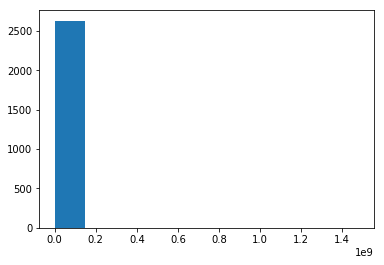

In [20]:
plt.hist(daily_totals['ENTRIES']);

In [22]:
strange_data

,STATION,DATE,ENTRIES,EXITS
193,174-175 STS,2018-06-27,1324712,1088270
232,182-183 STS,2018-06-24,1482156924,1838306283
1158,BRONX PARK EAST,2018-06-26,986019372,434534593
1171,BROOKLYN BRIDGE,2018-06-25,700597,483358
1486,EXCHANGE PLACE,2018-06-27,457638,1500225
1487,EXCHANGE PLACE,2018-06-28,458049,1502215
1836,KINGSBRIDGE RD,2018-06-27,701876539,701935036
1887,LEXINGTON AV/53,2018-06-29,1282950578,1706262835
2212,PAVONIA/NEWPORT,2018-06-25,871109,107799
2450,THIRTY ST,2018-06-25,201383,26049


In [23]:
daily_totals = daily_totals[daily_totals['ENTRIES'] < 200000]

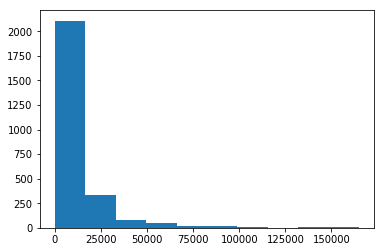

In [24]:
plt.hist(daily_totals['ENTRIES']);

In [28]:
weekly_totals = daily_totals.groupby('STATION').sum()
weekly_totals.sort_values('ENTRIES', ascending=False)

,ENTRIES,EXITS
STATION,,
34 ST-PENN STA,916594,795331
GRD CNTRL-42 ST,843043,801706
34 ST-HERALD SQ,661141,635422
23 ST,610671,483471
14 ST-UNION SQ,576210,546532
42 ST-PORT AUTH,562206,428060
FULTON ST,553649,468883
TIMES SQ-42 ST,521950,553227
CANAL ST,490688,980663
